## Prepare dataset for the hook {Draw your own chart} Visualization

In [151]:
import pandas as pd
import datetime
import calendar

## Load the raw tweet dataset;

In [179]:
df = pd.read_csv("covid19_tweets_final.csv", encoding="utf-8")
df = df[["date","sentiment_score_hf","sentiment_tag_hf"]]
df.head(5)

,date,sentiment_score_hf,sentiment_tag_hf
0,2020-01-27 00:24:01,0.997167,NEGATIVE
1,2020-01-27 00:37:26,0.999039,NEGATIVE
2,2020-01-27 00:50:36,0.980284,NEGATIVE
3,2020-01-27 00:58:18,0.971413,NEGATIVE
4,2020-01-27 00:58:25,0.993612,NEGATIVE


In [180]:
df.dtypes

date                   object
sentiment_score_hf    float64
sentiment_tag_hf       object
dtype: object

In [181]:
df["date"] = pd.to_datetime(df["date"])

In [182]:
df.dtypes

date                  datetime64[ns]
sentiment_score_hf           float64
sentiment_tag_hf              object
dtype: object

In [183]:
df = df.sort_values(by=['date'], ascending=True)

In [184]:
df.head(5)

,date,sentiment_score_hf,sentiment_tag_hf
0,2020-01-27 00:24:01,0.997167,NEGATIVE
1,2020-01-27 00:37:26,0.999039,NEGATIVE
2,2020-01-27 00:50:36,0.980284,NEGATIVE
3,2020-01-27 00:58:18,0.971413,NEGATIVE
4,2020-01-27 00:58:25,0.993612,NEGATIVE


In [185]:
df["month_int"] = pd.DatetimeIndex(df["date"]).month

In [186]:
df.head(5)

,date,sentiment_score_hf,sentiment_tag_hf,month_int
0,2020-01-27 00:24:01,0.997167,NEGATIVE,1
1,2020-01-27 00:37:26,0.999039,NEGATIVE,1
2,2020-01-27 00:50:36,0.980284,NEGATIVE,1
3,2020-01-27 00:58:18,0.971413,NEGATIVE,1
4,2020-01-27 00:58:25,0.993612,NEGATIVE,1


In [187]:
df = df[["month_int","sentiment_score_hf","sentiment_tag_hf"]]
df.head(5)

,month_int,sentiment_score_hf,sentiment_tag_hf
0,1,0.997167,NEGATIVE
1,1,0.999039,NEGATIVE
2,1,0.980284,NEGATIVE
3,1,0.971413,NEGATIVE
4,1,0.993612,NEGATIVE


In [188]:
df_negative = df[df['sentiment_tag_hf'] == 'NEGATIVE']
df_positive = df[df['sentiment_tag_hf'] == 'POSITIVE']
print(df_negative.shape)
print(df_positive.shape)

(73763, 3)
(17685, 3)


In [189]:
df_negative_summary = df_negative.groupby(["month_int"])["sentiment_score_hf"].count().reset_index(name="negative_tweets")
df_positive_summary = df_positive.groupby(["month_int"])["sentiment_score_hf"].count().reset_index(name="positive_tweets")


In [190]:
def mapper(month):
   return month.strftime('%b') 
d = dict(enumerate(calendar.month_abbr))

df_negative_summary['month'] = df_negative_summary['month_int'].map(d)
df_positive_summary['month'] = df_positive_summary['month_int'].map(d)

df_negative_summary = df_negative_summary[["month","negative_tweets"]]
df_positive_summary = df_positive_summary[["month","positive_tweets"]]

print(df_negative_summary.head(5))
print(df_positive_summary.head(5))


  month  negative_tweets
0   Jan             1122
1   Feb             3564
2   Mar             4583
3   Apr             3634
4   May             3894
  month  positive_tweets
0   Jan              176
1   Feb              673
2   Mar             1007
3   Apr             1001
4   May             1018


<AxesSubplot:xlabel='month'>

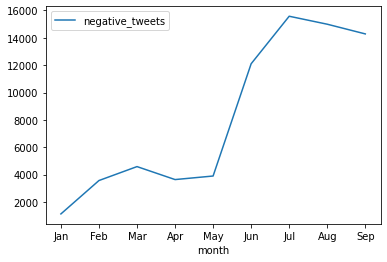

In [191]:
df_negative_summary[["month","negative_tweets"]].plot.line(x='month',y='negative_tweets')

<AxesSubplot:xlabel='month'>

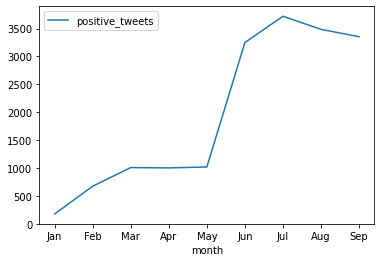

In [192]:
df_positive_summary[["month","positive_tweets"]].plot.line(x='month',y='positive_tweets')

In [193]:
df_sentiment_count_summary = df_negative_summary.set_index('month').join(df_positive_summary.set_index('month'))
df_sentiment_count_summary.head(5)

,negative_tweets,positive_tweets
month,,
Jan,1122,176
Feb,3564,673
Mar,4583,1007
Apr,3634,1001
May,3894,1018


<AxesSubplot:xlabel='month'>

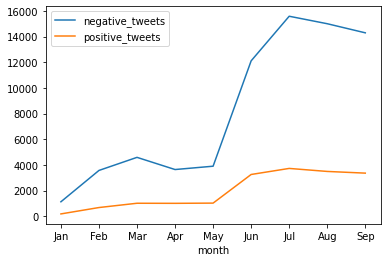

In [194]:
df_sentiment_count_summary.plot()

<AxesSubplot:ylabel='Frequency'>

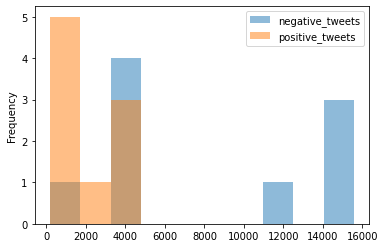

In [195]:
df_sentiment_count_summary.plot.hist(alpha=0.5)

## Write the prepared output data for the Hook visualization

In [177]:
df_sentiment_count_summary.to_csv("sentiment_frequency_summary.csv",header=True)
df_negative_summary.to_csv("negative_summary.csv",header=True)
df_positive_summary.to_csv("positive_summary.csv",header=True)

In [197]:
df_sentiment_count_summary.describe()

,negative_tweets,positive_tweets
count,9.000000,9.000000
mean,8195.888889,1965.000000
std,5884.207157,1439.991667
min,1122.000000,176.000000
25%,3634.000000,1001.000000
50%,4583.000000,1018.000000
75%,14287.000000,3354.000000
max,15579.000000,3721.000000
